In [30]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Set project root to ml_project directory
if os.getcwd().endswith('src'):
    os.chdir('..')
    
project_root = os.getcwd()
print(f"Working directory: {project_root}")

# Load datasets
main_df = pd.read_pickle("data/merged_learn_dataset.pkl")

# Split
train_df, test_df = train_test_split(main_df, test_size=0.2, random_state=0)

Working directory: /Users/arthur/Documents/Universite/M2-QEA/Machine Learning/final_project/ml_project


In [ ]:
# Check data structure
print(f"Dataset shape: {main_df.shape}")
print(f"\nColumn types:\n{main_df.dtypes.value_counts()}")
print(f"\nFirst few columns: {list(main_df.columns[:10])}")
print(f"\nMissing values: {main_df.isnull().sum().sum()}")
print(f"\nTarget column present: {'target' in main_df.columns}")


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Simple pipeline for preprocessed data (already one-hot encoded)
# Since data is already preprocessed, we only need imputation and optional scaling

# Create a simple pipeline
model_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle any remaining missing values
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', RandomForestRegressor(n_jobs=-1, random_state=42))  # Reference algorithm
])

# Separate features and target
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']
X_test = test_df.drop(columns=['target'])
y_test = test_df['target']

# Fit the pipeline
print("Training pipeline...")
model_pipeline.fit(X_train, y_train)

# Make predictions
predictions = model_pipeline.predict(X_test)
print("✓ Pipeline trained and predictions made")


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.019188818594740684
Root Mean Squared Error: 0.13852371130871668


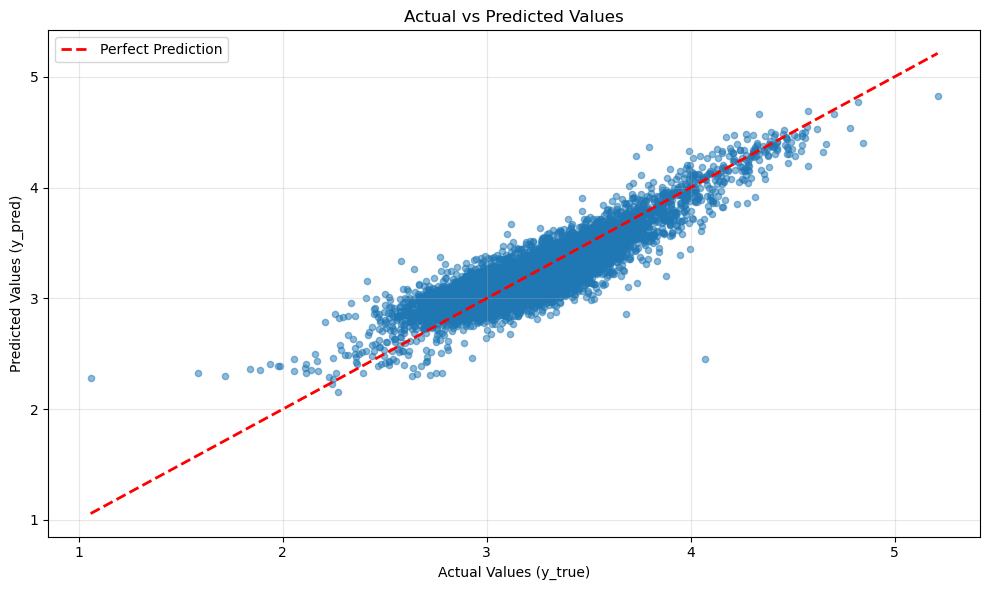

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, s=20)

# Add 45-degree line (perfect prediction line)
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values (R² = {r2:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
